<a href="https://colab.research.google.com/github/TranTheVy/PredictHousePrice/blob/main/KNN_NEURAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn.datasets

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
print("Keys of the digits dataset:", digits.keys())
print("Shape of the data:", digits.data.shape)
print("Shape of the target:", digits.target.shape)
print("\nDescription of the digits dataset:\n", digits.DESCR)

Keys of the digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of the data: (1797, 64)
Shape of the target: (1797,)

Description of the digits dataset:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 

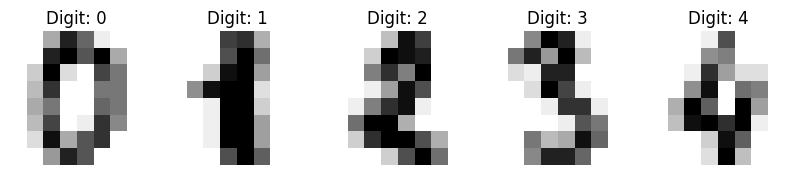

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_title(f"Digit: {label}")
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_axis_off()
plt.show()

In [7]:
X = digits.data
y = digits.target

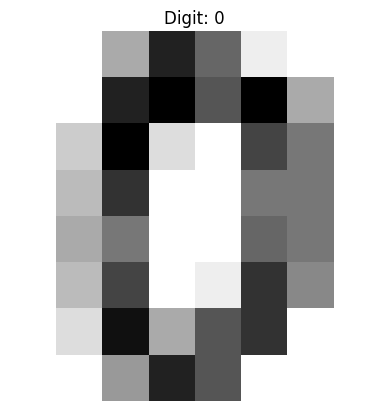

In [8]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f"Digit: {digits.target[0]}")
plt.axis("off")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training targets (y_train):", y_train.shape)
print("Shape of testing targets (y_test):", y_test.shape)

Shape of training data (X_train): (1437, 64)
Shape of testing data (X_test): (360, 64)
Shape of training targets (y_train): (1437,)
Shape of testing targets (y_test): (360,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=3) # You can adjust the number of neighbors (k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy:.4f}")

Accuracy of the KNN classifier: 0.9833


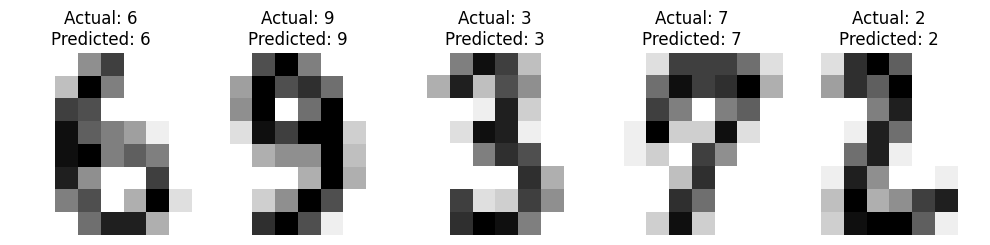

In [11]:
import matplotlib.pyplot as plt

# Select a few images from the test set
num_images_to_show = 5
sample_indices = range(num_images_to_show)

fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(10, 3))

for i, ax in zip(sample_indices, axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [13]:
# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train.astype('float32') / 16
X_test_normalized = X_test.astype('float32') / 16

print("Shape of normalized training data:", X_train_normalized.shape)
print("Shape of normalized testing data:", X_test_normalized.shape)

Shape of normalized training data: (1437, 64)
Shape of normalized testing data: (360, 64)


In [1]:
# Define the neural network model
model = Sequential([
    Flatten(input_shape=(64,)),  # Flatten the 8x8 images into a 1D array
    Dense(128, activation='relu'), # A hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digits) and softmax activation
])

NameError: name 'Sequential' is not defined

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(64,)),  # Flatten the 8x8 images into a 1D array
    Dense(128, activation='relu'), # A hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digits) and softmax activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

NameError: name 'X_train_normalized' is not defined

In [5]:
# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train.astype('float32') / 16
X_test_normalized = X_test.astype('float32') / 16

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

NameError: name 'X_train' is not defined

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for numerical operations

# Load the data (assuming digits is already loaded)
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train.astype('float32') / 16
X_test_normalized = X_test.astype('float32') / 16

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

NameError: name 'digits' is not defined

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for numerical operations
from sklearn.datasets import load_digits # Import load_digits

# Load the data
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train.astype('float32') / 16
X_test_normalized = X_test.astype('float32') / 16

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2729 - loss: 2.1852 - val_accuracy: 0.7326 - val_loss: 1.7150
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 1.5593 - val_accuracy: 0.8646 - val_loss: 1.1371
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9009 - loss: 1.0091 - val_accuracy: 0.8785 - val_loss: 0.7561
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9104 - loss: 0.6679 - val_accuracy: 0.9028 - val_loss: 0.5441
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.4807 - val_accuracy: 0.9097 - val_loss: 0.4365
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.3544 - val_accuracy: 0.9236 - val_loss: 0.3791
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9532 - loss: 0.3153 - val_accuracy: 0.9271 - val_loss: 0.3322
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.2568 - val_accuracy: 0.9236 - val_loss:

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2115
Test Accuracy: 0.9472


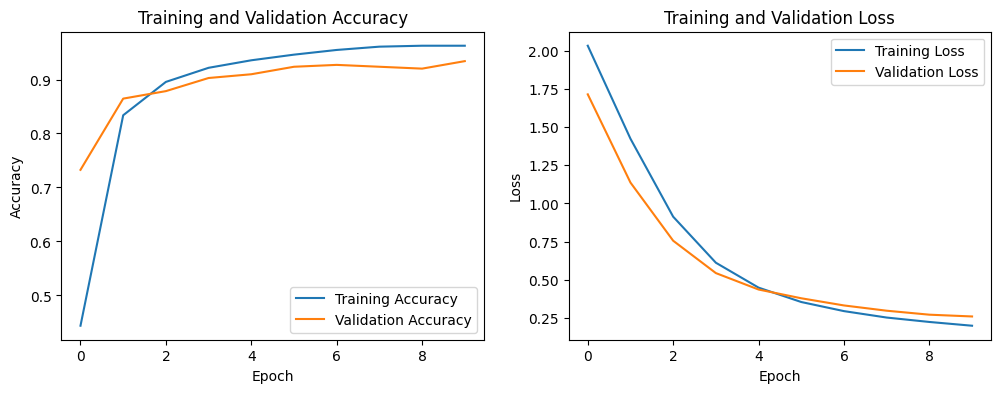

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()